# Predicting Median value of owner-occupied homes

The aim of this assignment is to learn the application of machine learning algorithms to data sets. This involves learning what data means, how to handle data, training, cross validation, prediction, testing your model, etc.

This dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass. It was obtained from the StatLib archive, and has been used extensively throughout the literature to benchmark algorithms. The data was originally published by Harrison, D. and Rubinfeld, D.L. Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.

The dataset is small in size with only 506 cases. It can be used to predict the median value of a home, which is done here. 

There are 14 attributes in each case of the dataset. They are:

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's


Since the target has been given, it is a supervised learning problem. As the target is a continuous variable, it will be a regression problem.

# Importing important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [2]:
df = pd.read_csv('BostonHousing.csv')

# Data cleaning

In [3]:
df.shape

(506, 14)

In [4]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
df.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

In [6]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [7]:
df = df.drop_duplicates()
df.shape

(506, 14)

In [8]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Checking for outliers in data using IQR approach.

In [9]:
# crim
iqr = df['crim'].quantile(0.75) - df['crim'].quantile(0.25)
print('IQR :', iqr)
upper_threshold = df['crim'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['crim'].quantile(0.25) - (1.5 * iqr)
print('Upper threshold :', upper_threshold)
print('Lower threshold :', lower_threshold)

IQR : 3.5950375
Upper threshold : 9.06963875
Lower threshold : -5.31051125


In [10]:
df.crim = df.crim.clip(-5.31051125,9.06963875)

In [11]:
# zn
iqr = df['zn'].quantile(0.75) - df['zn'].quantile(0.25)
print('IQR :', iqr)
upper_threshold = df['zn'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['zn'].quantile(0.25) - (1.5 * iqr)
print('Upper threshold :', upper_threshold)
print('Lower threshold :', lower_threshold)

IQR : 12.5
Upper threshold : 31.25
Lower threshold : -18.75


In [12]:
df.zn = df.zn.clip(-18.75,31.25)

In [13]:
# indus
iqr = df['indus'].quantile(0.75) - df['indus'].quantile(0.25)
print('IQR :', iqr)
upper_threshold = df['indus'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['indus'].quantile(0.25) - (1.5 * iqr)
print('Upper threshold :', upper_threshold)
print('Lower threshold :', lower_threshold)

IQR : 12.91
Upper threshold : 37.465
Lower threshold : -14.175


In [14]:
# chas
iqr = df['chas'].quantile(0.75) - df['chas'].quantile(0.25)
print('IQR :', iqr)
upper_threshold = df['chas'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['chas'].quantile(0.25) - (1.5 * iqr)
print('Upper threshold :', upper_threshold)
print('Lower threshold :', lower_threshold)

IQR : 0.0
Upper threshold : 0.0
Lower threshold : 0.0


In [15]:
# nox
iqr = df['nox'].quantile(0.75) - df['nox'].quantile(0.25)
print('IQR :', iqr)
upper_threshold = df['nox'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['nox'].quantile(0.25) - (1.5 * iqr)
print('Upper threshold :', upper_threshold)
print('Lower threshold :', lower_threshold)

IQR : 0.175
Upper threshold : 0.8865
Lower threshold : 0.18650000000000005


In [16]:
# rm
iqr = df['rm'].quantile(0.75) - df['rm'].quantile(0.25)
print('IQR :', iqr)
upper_threshold = df['rm'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['rm'].quantile(0.25) - (1.5 * iqr)
print('Upper threshold :', upper_threshold)
print('Lower threshold :', lower_threshold)

IQR : 0.7380000000000004
Upper threshold : 7.730500000000001
Lower threshold : 4.778499999999999


In [17]:
# age
iqr = df['age'].quantile(0.75) - df['age'].quantile(0.25)
print('IQR :', iqr)
upper_threshold = df['age'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['age'].quantile(0.25) - (1.5 * iqr)
print('Upper threshold :', upper_threshold)
print('Lower threshold :', lower_threshold)

IQR : 49.04999999999999
Upper threshold : 167.64999999999998
Lower threshold : -28.54999999999999


In [18]:
# dis
iqr = df['dis'].quantile(0.75) - df['dis'].quantile(0.25)
print('IQR :', iqr)
upper_threshold = df['dis'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['dis'].quantile(0.25) - (1.5 * iqr)
print('Upper threshold :', upper_threshold)
print('Lower threshold :', lower_threshold)

IQR : 3.0882500000000004
Upper threshold : 9.820800000000002
Lower threshold : -2.5322000000000005


In [19]:
# rad
iqr = df['rad'].quantile(0.75) - df['rad'].quantile(0.25)
print('IQR :', iqr)
upper_threshold = df['rad'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['rad'].quantile(0.25) - (1.5 * iqr)
print('Upper threshold :', upper_threshold)
print('Lower threshold :', lower_threshold)

IQR : 20.0
Upper threshold : 54.0
Lower threshold : -26.0


In [20]:
# tax
iqr = df['tax'].quantile(0.75) - df['tax'].quantile(0.25)
print('IQR :', iqr)
upper_threshold = df['tax'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['tax'].quantile(0.25) - (1.5 * iqr)
print('Upper threshold :', upper_threshold)
print('Lower threshold :', lower_threshold)

IQR : 387.0
Upper threshold : 1246.5
Lower threshold : -301.5


In [21]:
# ptratio
iqr = df['ptratio'].quantile(0.75) - df['ptratio'].quantile(0.25)
print('IQR :', iqr)
upper_threshold = df['ptratio'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['ptratio'].quantile(0.25) - (1.5 * iqr)
print('Upper threshold :', upper_threshold)
print('Lower threshold :', lower_threshold)

IQR : 2.8000000000000007
Upper threshold : 24.4
Lower threshold : 13.199999999999998


In [22]:
# b
iqr = df['b'].quantile(0.75) - df['b'].quantile(0.25)
print('IQR :', iqr)
upper_threshold = df['b'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['b'].quantile(0.25) - (1.5 * iqr)
print('Upper threshold :', upper_threshold)
print('Lower threshold :', lower_threshold)

IQR : 20.847500000000025
Upper threshold : 427.49625000000003
Lower threshold : 344.10624999999993


In [23]:
# lstat
iqr = df['lstat'].quantile(0.75) - df['lstat'].quantile(0.25)
print('IQR :', iqr)
upper_threshold = df['lstat'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['lstat'].quantile(0.25) - (1.5 * iqr)
print('Upper threshold :', upper_threshold)
print('Lower threshold :', lower_threshold)

IQR : 10.005000000000003
Upper threshold : 31.962500000000006
Lower threshold : -8.057500000000005


# EDA

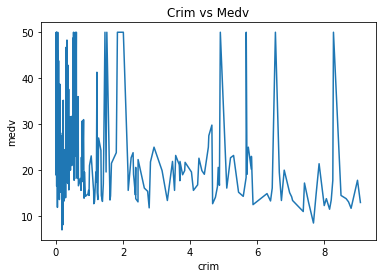

In [24]:
df.groupby('crim')['medv'].mean().plot()
plt.title('Crim vs Medv')
plt.xlabel('crim')
plt.ylabel('medv')
plt.show()

In [25]:
df[['crim','medv']].corr()

,crim,medv
crim,1.000000,-0.454495
medv,-0.454495,1.000000


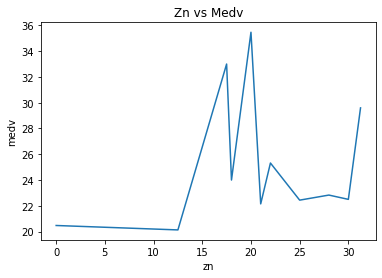

In [26]:
df.groupby('zn')['medv'].mean().plot()
plt.title('Zn vs Medv')
plt.xlabel('zn')
plt.ylabel('medv')
plt.show()

In [27]:
df[['zn','medv']].corr()

,zn,medv
zn,1.000000,0.374691
medv,0.374691,1.000000


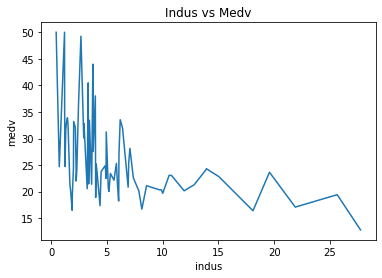

In [28]:
df.groupby('indus')['medv'].mean().plot()
plt.title('Indus vs Medv')
plt.xlabel('indus')
plt.ylabel('medv')
plt.show()

In [29]:
df[['indus','medv']].corr()

,indus,medv
indus,1.000000,-0.483725
medv,-0.483725,1.000000


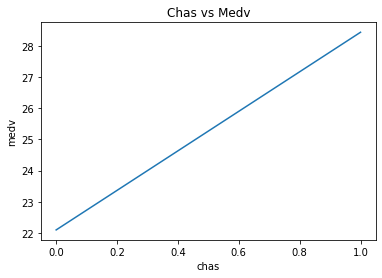

In [30]:
df.groupby('chas')['medv'].mean().plot()
plt.title('Chas vs Medv')
plt.xlabel('chas')
plt.ylabel('medv')
plt.show()

In [31]:
df[['chas','medv']].corr()

,chas,medv
chas,1.00000,0.17526
medv,0.17526,1.00000


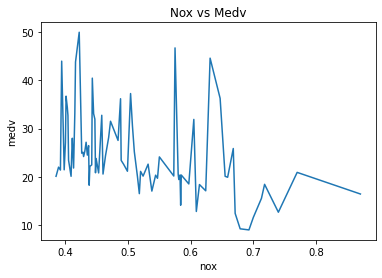

In [32]:
df.groupby('nox')['medv'].mean().plot()
plt.title('Nox vs Medv')
plt.xlabel('nox')
plt.ylabel('medv')
plt.show()

In [33]:
df[['nox','medv']].corr()

,nox,medv
nox,1.000000,-0.427321
medv,-0.427321,1.000000


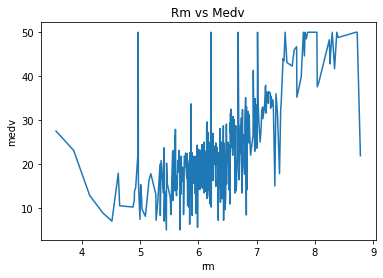

In [34]:
df.groupby('rm')['medv'].mean().plot()
plt.title('Rm vs Medv')
plt.xlabel('rm')
plt.ylabel('medv')
plt.show()

In [35]:
df[['rm','medv']].corr()

,rm,medv
rm,1.00000,0.69536
medv,0.69536,1.00000


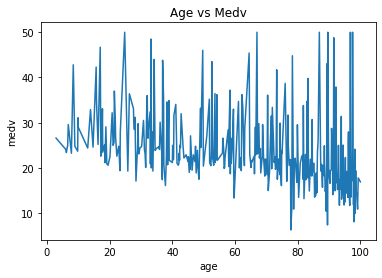

In [36]:
df.groupby('age')['medv'].mean().plot()
plt.title('Age vs Medv')
plt.xlabel('age')
plt.ylabel('medv')
plt.show()

In [37]:
df[['age','medv']].corr()

,age,medv
age,1.000000,-0.376955
medv,-0.376955,1.000000


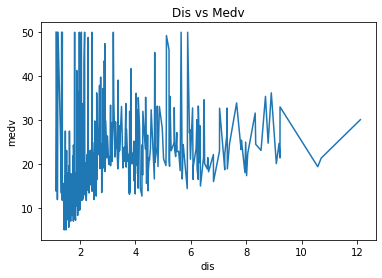

In [38]:
df.groupby('dis')['medv'].mean().plot()
plt.title('Dis vs Medv')
plt.xlabel('dis')
plt.ylabel('medv')
plt.show()

In [39]:
df[['dis','medv']].corr()

,dis,medv
dis,1.000000,0.249929
medv,0.249929,1.000000


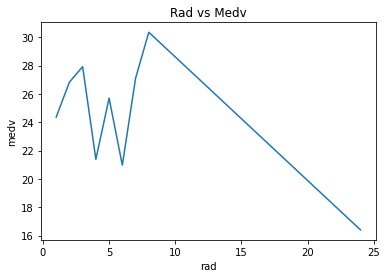

In [40]:
df.groupby('rad')['medv'].mean().plot()
plt.title('Rad vs Medv')
plt.xlabel('rad')
plt.ylabel('medv')
plt.show()

In [41]:
df[['rad','medv']].corr()

,rad,medv
rad,1.000000,-0.381626
medv,-0.381626,1.000000


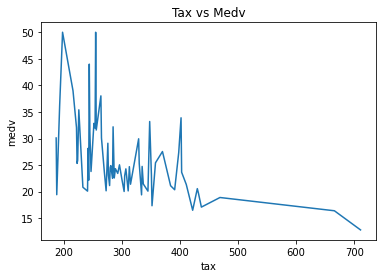

In [42]:
df.groupby('tax')['medv'].mean().plot()
plt.title('Tax vs Medv')
plt.xlabel('tax')
plt.ylabel('medv')
plt.show()

In [43]:
df[['tax','medv']].corr()

,tax,medv
tax,1.000000,-0.468536
medv,-0.468536,1.000000


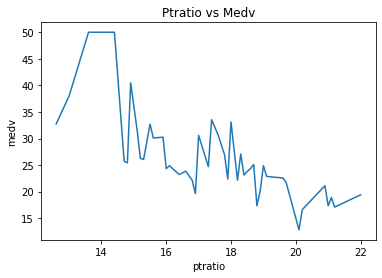

In [44]:
df.groupby('ptratio')['medv'].mean().plot()
plt.title('Ptratio vs Medv')
plt.xlabel('ptratio')
plt.ylabel('medv')
plt.show()

In [45]:
df[['ptratio','medv']].corr()

,ptratio,medv
ptratio,1.000000,-0.507787
medv,-0.507787,1.000000


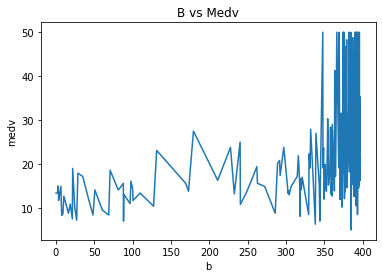

In [46]:
df.groupby('b')['medv'].mean().plot()
plt.title('B vs Medv')
plt.xlabel('b')
plt.ylabel('medv')
plt.show()

In [47]:
df[['b','medv']].corr()

,b,medv
b,1.000000,0.333461
medv,0.333461,1.000000


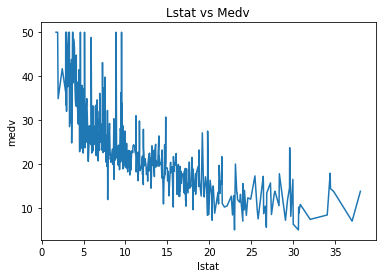

In [48]:
df.groupby('lstat')['medv'].mean().plot()
plt.title('Lstat vs Medv')
plt.xlabel('lstat')
plt.ylabel('medv')
plt.show()

In [49]:
df[['lstat','medv']].corr()

,lstat,medv
lstat,1.000000,-0.737663
medv,-0.737663,1.000000


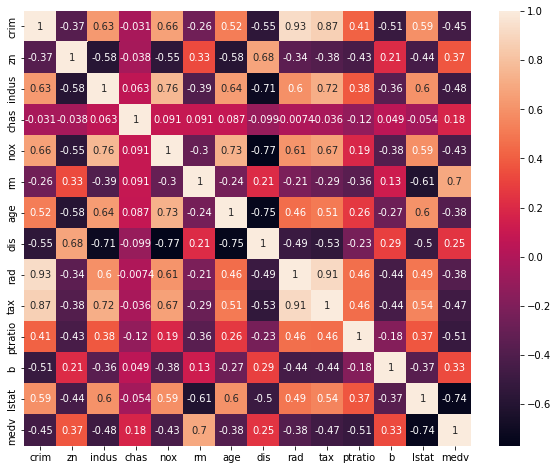

In [50]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), annot = True)
plt.show()

As we can see from the correlation table, every feature except chas, has a linear relationship with the target. So we can proceed with Linear Regression model with the other features.

# Data prepartion

In [51]:
X = df[['crim','zn','indus','nox','rm','age','dis','rad','tax','ptratio','b','lstat']].values  # Features
y = df['medv'].values  # Target

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state = 555)

In [53]:
X_train.shape, X_test.shape

((354, 12), (152, 12))

We have split the data into train and test.


*   70% for training
*   30% for testing



In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

We have also scaled the data using Standard Scaler.

# Model training for linear regression

In [55]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [56]:
print('Intercept :', regressor.intercept_)

Intercept : 22.716384180791


In [57]:
coef_df = pd.DataFrame(regressor.coef_, ['crim','zn','indus','nox','rm','age','dis','rad','tax','ptratio','b','lstat'], columns=['Coefficient'])

In [58]:
coef_df

,Coefficient
crim,-0.857597
zn,0.385563
indus,0.308246
nox,-1.466142
rm,2.958513
age,0.156138
dis,-2.312957
rad,2.686476
tax,-1.919942
ptratio,-2.063574


# Prediction of linear regression model

In [59]:
y_pred = regressor.predict(X_test_scaled)

# Evaluation metric for linear regression model

In [60]:
from sklearn import metrics
print('R2 Score for Linear Regression :', metrics.r2_score(y_test,y_pred))

R2 Score for Linear Regression : 0.7574279541265725


# Model training for lasso regression

In [61]:
from sklearn.linear_model import Lasso
las = Lasso()
las.fit(X_train_scaled, y_train)

Lasso()

In [62]:
print('Intercept :', las.intercept_)

Intercept : 22.71638418079099


In [63]:
coef_df = pd.DataFrame(las.coef_, ['crim','zn','indus','nox','rm','age','dis','rad','tax','ptratio','b','lstat'], columns=['Coefficient'])
coef_df

,Coefficient
crim,-0.000000
zn,0.000000
indus,-0.000000
nox,-0.000000
rm,2.723363
age,-0.000000
dis,-0.000000
rad,-0.000000
tax,-0.000000
ptratio,-1.199984


# Prediction of lasso model

In [64]:
y_pred = las.predict(X_test_scaled)

# Evaluation metric for lasso model

In [65]:
print('R2 Score for Lasso:', metrics.r2_score(y_test, y_pred))

R2 Score for Lasso: 0.6815141571245376


# Model training for ridge regression

In [66]:
from sklearn.linear_model import Ridge
rid = Ridge()
rid.fit(X_train_scaled, y_train)

Ridge()

In [67]:
print('Intercept :', rid.intercept_)

Intercept : 22.716384180791


In [68]:
coef_df = pd.DataFrame(rid.coef_, ['crim','zn','indus','nox','rm','age','dis','rad','tax','ptratio','b','lstat'], columns=['Coefficient'])
coef_df

,Coefficient
crim,-0.796831
zn,0.379477
indus,0.281780
nox,-1.444782
rm,2.963702
age,0.148558
dis,-2.292344
rad,2.555874
tax,-1.839376
ptratio,-2.051118


# Prediction of ridge model

In [69]:
y_pred = rid.predict(X_test_scaled)

# Evaluation metric for ridge model

In [70]:
print('R2 Score for Ridge :', metrics.r2_score(y_test, y_pred))

R2 Score for Ridge : 0.7573218287196334


# Comparing the performance of all the 3 models

In [71]:
print('Linear Regresssion :', regressor.score(X_test_scaled, y_test))
print('Lasso Regression(L1 norm) :', las.score(X_test_scaled, y_test))
print('Ridge Regresssion(L2 norm) :', rid.score(X_test_scaled, y_test))

Linear Regresssion : 0.7574279541265725
Lasso Regression(L1 norm) : 0.6815141571245376
Ridge Regresssion(L2 norm) : 0.7573218287196334


From this, we can say that, in this case both linear regression and ridge regression has performed similarly with the R2 score of 0.75.

For this dataset, Linear Regression itself is a good model with 75% accuracy.